# Analysis of locus variation across mtb complex

These methods were used to analyse the RD900 locus.

## find SNPs (snpgenie)

* align samples to a suitable reference locus e.g. MAF TBD1
* call variants
* build tree from snps

## find region deletions 

* requires the reference locus sequence is a 'complete' version
* use same alignments as above to calculate coverage across the locus
* or view in IGV

## Links

* [MAF GM041182 genome](https://www.ncbi.nlm.nih.gov/nuccore/FR878060.1?report=graph)

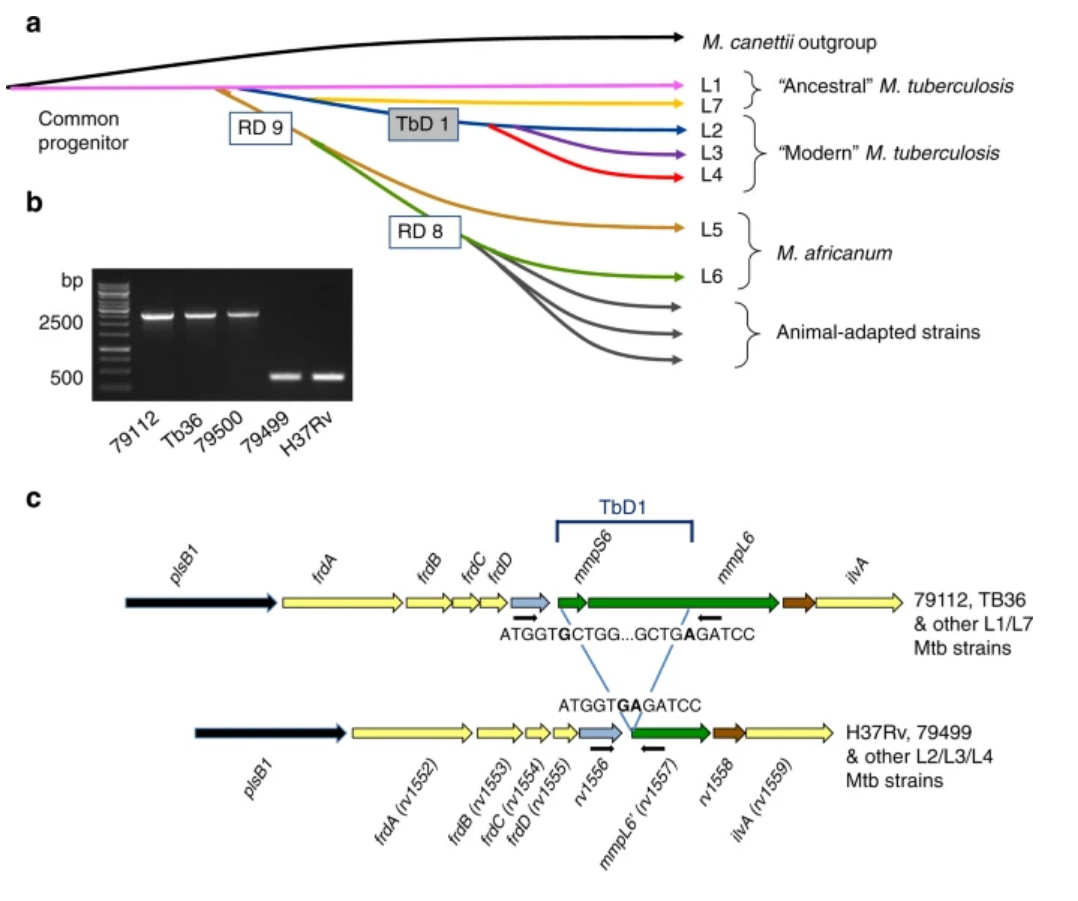

In [3]:
from IPython.display import Image
Image(filename = "tbd1_locus.png", width=600)

In [4]:
import os, glob, subprocess
from importlib import reload
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.SeqFeature import SeqFeature, FeatureLocation
from BCBio import GFF
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from snpgenie import tools, aligners, app, trees, plotting

In [5]:
df=pd.read_csv('../genomes_data.csv')
path = '/storage/elena_data'
df[:5]

,ACCESSION,PAIRED,LINEAGE,ORIGIN,BIOPROJECT,BIOSAMPLE,Reads lenght (bp),LINK1,LINK2,REFERENCE
0,ERR2642516,no,M. caprae,NaN,PRJEB27266,\t\nSAMEA4732081,51,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR264/006/...,NaN,Brites et al. 2018
1,ERR551023,yes,M. caprae,Congo,PRJEB9545,SAMEA2533642,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,Malm et al. 2017
2,ERR551704,yes,M. caprae,Germany,PRJEB9545,SAMEA2534133,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR551/ERR5...,Malm et al. 2017
3,ERR552526,yes,M. caprae,Germany,PRJEB9545,SAMEA2534708,150,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR5...,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR552/ERR5...,Malm et al. 2017
4,ERR841382,no,M. caprae,NaN,PRJEB9003,SAMEA3318466,51,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR841/ERR8...,NaN,Domogalla et al. 2013


## load locus features

In [18]:
rec = list(SeqIO.parse('MAF_GM041182_TBD1.gb',format='gb'))[0]
#rec.features

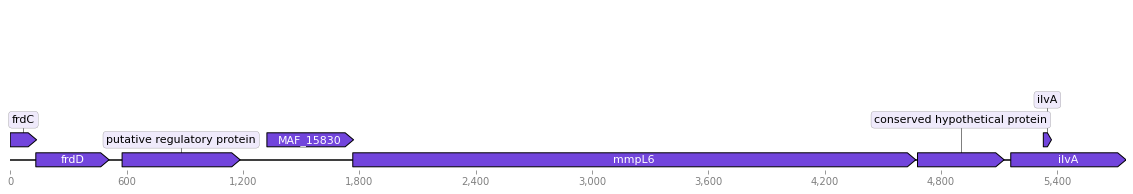

In [21]:
from dna_features_viewer import GraphicFeature, GraphicRecord
from dna_features_viewer import BiopythonTranslator

graphic_record = BiopythonTranslator().translate_record(rec)
fig,axs=plt.subplots(1,1,figsize=(20,3))

ax, levels = graphic_record.plot(ax=axs)#,annotate_inline=True)

## run snpgenie against sigK locus sequence

In [ ]:
args = {'threads':8, 'outdir': 'snpgenie_results', 'labelsep':'-',  
        'input':['/storage/elena_data/'],        
        'reference': 'MAF_GM041182_TBD1.fa', 'gb_file':'MAF_GM041182_TBD1.gb',
        'overwrite':False,
        'filters' : 'QUAL>=30 && FORMAT/DP>=30 && DP4>=4 && MQ>35'
        }
W = app.WorkFlow(**args)
st = W.setup()
W.run()

## snps

In [6]:
c = app.read_csq_file('snp_results/csq.tsv')
c=c[c.snp_type!='synonymous']
#c[c.gene=='rskA']
muts = list(c.aa.dropna().unique())
#muts

In [7]:
X=pd.read_csv('snp_results/csq.matrix')
X = X[X.aa.isin(muts)]
X=X.set_index(['gene','aa']).sort_index()

labelmap = dict(zip(df.ACCESSION,df.LINEAGE))
X=X.rename(columns=labelmap)
X.loc['rskA']

,M. canetti STB-A,M. tuberculosis L2,BCG,M. tuberculosis L5,M. canetti STB-K-S,M. canetti STB-K-R,M. tuberculosis L7,M. tuberculosis L7,M. tuberculosis L7,M. tuberculosis L7,...,M. caprae,M. caprae,M. canetii,M. bovis,M. bovis,BCG,M. bovis,M. caprae,M. canetti (NYS),WT_S18_L001
aa,,,,,,,,,,,,,,,,,,,,,
107G>107D,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
184G>184E,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
216T>216A,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220Q>220R,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
233*>233S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41A>41V,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79K>79I,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81E>81D,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#plotting.plot_matrix(X,w=14,h=7)
sns.clustermap(X,row_cluster=False,cmap='gray_r')

## phylogeny using sigK locus

In [8]:
summ = pd.read_csv('snp_results/summary.csv')

In [31]:
trees.run_RAXML('snp_results/core.fa',outpath='temp')

raxmlHPC-PTHREADS -f a -N 10 -T 8 -m GTRCAT -V -p 32750624 -x 91511799 -n variants -w /home/damien/gitprojects/rd900/sigK_regulon/temp -s snp_results/core.fa


'/home/damien/gitprojects/rd900/sigK_regulon/temp/RAxML_bipartitions.variants'

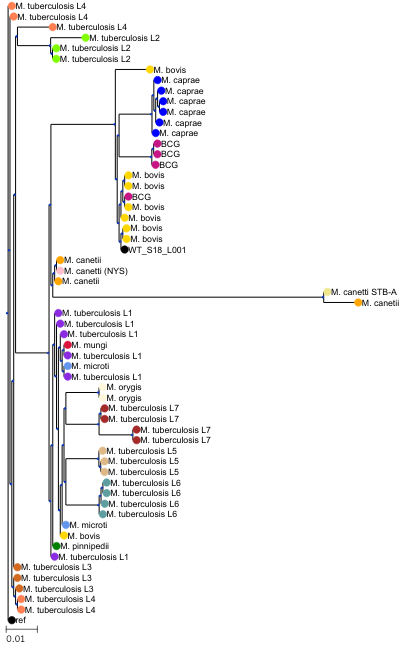

In [99]:
reload(trees)
colormap = trees.colors_from_labels(df,'ACCESSION','LINEAGE')
labelmap = dict(zip(df.ACCESSION,df.LINEAGE))
tree,ts = trees.create_tree('temp/RAxML_bestTree.variants',None,labelmap,colormap)
names=['M. canetti STB-K-S','M. canetti STB-K-R']
trees.remove_nodes(tree, names)

ts.scale = 5000
#ts.mode = 'c'
ts.margin_left = 10
ts.branch_vertical_margin = 1
#ts.force_topology = True
tree.render('%%inline',tree_style=ts,w=400)